In [1]:
!pip install seaborn

  Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl.metadata (61 kB)
  Using cached matplotlib-3.9.0-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.2.1-cp312-cp312-win_amd64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.51.0-cp312-cp312-win_amd64.whl.metadata (162 kB)
  Using cached kiwisolver-1.4.5-cp312-cp312-win_amd64.whl.metadata (6.5 kB)
  Using cached pillow-10.3.0-cp312-cp312-win_amd64.whl.metadata (9.4 kB)
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 660.6 kB/s eta 0:00:01
   -------- ------------------------------ 61.4/294.9 kB 544.7 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/294.9

In [3]:
!pip install scikit-learn


     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.6 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.6 kB 435.7 kB/s eta 0:00:01
     -------------------------------- ----- 51.2/60.6 kB 375.8 kB/s eta 0:00:01
     -------------------------------------- 60.6/60.6 kB 461.8 kB/s eta 0:00:00
   ---------------------------------------- 0.0/10.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/10.9 MB 1.7 MB/s eta 0:00:07
   ---------------------------------------- 0.1/10.9 MB 980.4 kB/s eta 0:00:12
   ---------------------------------------- 0.1/10.9 MB 1.1 MB/s eta 0:00:10
   ---------------------------------------- 0.1/10.9 MB 1.1 MB/s eta 0:00:10
    --------------------------------------- 0.2/10.9 MB 612.6 kB/s eta 0:00:18
   - -------------------------------------- 0.4/10.9 MB 1.7 MB/s eta 0:00:07
   - -------------------------------------- 0.4/10.9 MB 1.7 MB/s eta 0:00:07
  

In [12]:
# Allows charts to appear in the notebook
%matplotlib inline

# Libraries for analysis
import pandas as pd
import numpy as np
from sklearn import svm

# Libraries for visuals
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.2)


In [14]:
# Read in muffin and cupcake ingredient data
recipes = pd.read_csv('Muffin.csv')
recipes.head()


,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0


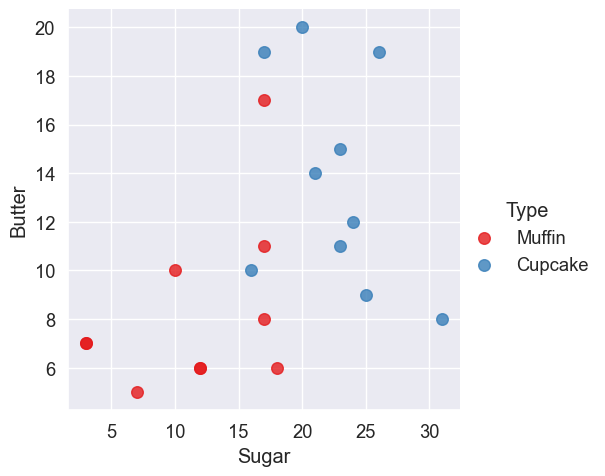

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


recipes = pd.read_csv('Muffin.csv')


sns.lmplot(x='Sugar', y='Butter', data=recipes, hue='Type', 
           palette='Set1', fit_reg=False, scatter_kws={"s": 70})


plt.show()


In [20]:
# Specify inputs for the model
# sugar_butter=recipes[['Sugar', 'Butter']].as_matrix() 老版
sugar_butter=recipes[['Sugar', 'Butter']].to_numpy()
type_label=np.where(recipes['Type']=='Muffin', 0, 1)

In [21]:
# Fit the SVM model
model=svm.SVC(kernel='linear', C=2**-5)

In [22]:
model.fit(sugar_butter, type_label)

SVC(C=0.03125, kernel='linear')

In [23]:
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(5, 30)
yy = a * xx - (model.intercept_[0]) / w[1]


In [24]:
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])


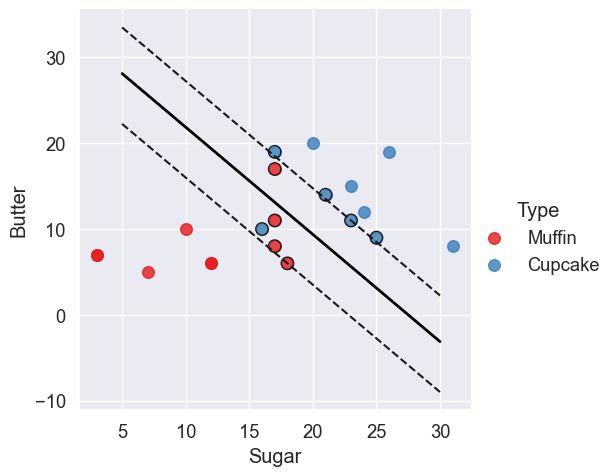

In [25]:
sns.lmplot(x='Sugar', y='Butter', data=recipes, hue='Type', 
           palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], 
            s=80, facecolors='none', edgecolors='k')
plt.show()


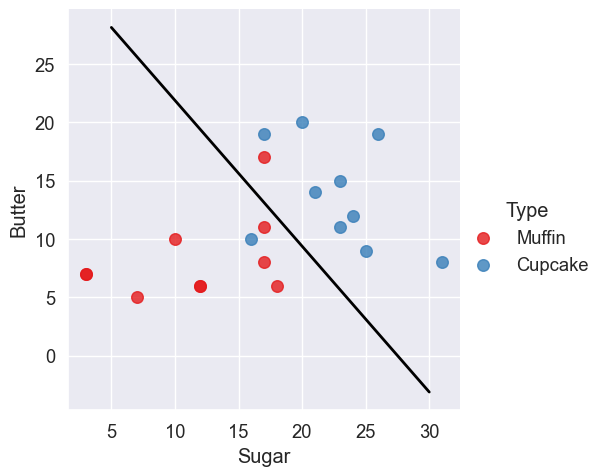

In [27]:
sns.lmplot(x='Sugar', y='Butter', data=recipes, hue='Type', 
           palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')

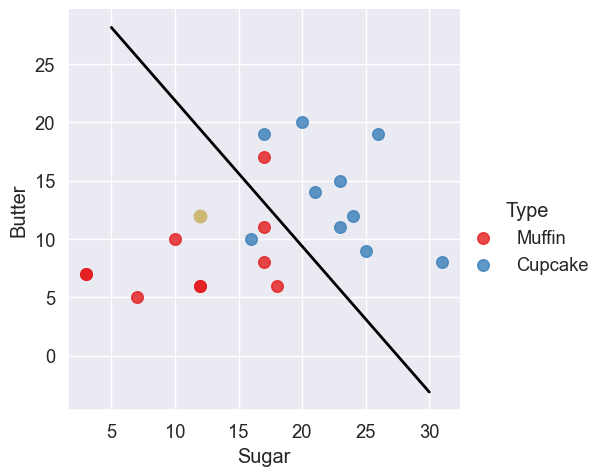

In [28]:
sns.lmplot(x='Sugar', y='Butter', data=recipes, hue='Type', 
           palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(12, 12, 'yo', markersize=9)


In [29]:
def muffin_or_cupcake(butter, sugar):
    if(model.predict([[butter, sugar]]) == 0):
        print("You're looking at a muffin recipe!")
    else:
        print("You're looking at a cupcake recipe!")


In [30]:
muffin_or_cupcake(12, 12)


You're looking at a muffin recipe!


In [31]:
model = svm.SVC(kernel='linear', decision_function_shape='ovr')
model.fit(sugar_butter, type_label)


SVC(kernel='linear')

In [32]:
model = svm.SVC(kernel='rbf', C=1, gamma=2**-5)
model.fit(sugar_butter, type_label)

SVC(C=1, gamma=0.03125)